## Exploring Survival Rates - <a href="https://www.kaggle.com/c/titanic"><font color='#28b9fa'>Titanic Dataset</font></a>

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('titanic.txt', sep='\t')
titanic.head(8)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750


<font color='blue'>Displaying proportion of survivors</font>

In [3]:
print('Proportion of Passengers who survived:', round(np.mean(titanic['Survived']), 4))

Proportion of Passengers who survived: 0.3856


<font color='blue'>Creating a DataFrame for the survivied grouped by Pclass and Sex</font>

In [4]:
columns = titanic.loc[:,['Pclass', 'Sex', 'Survived']]
gp_rates = columns.groupby(['Pclass','Sex']).mean()
surv_rates = pd.DataFrame(gp_rates)
surv_rates

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.137026

## Sex Distribution by Class and Outcome

<font color='blue'>Adding new columns for Female and Male </font>

In [5]:
titanic['Female'] = np.where(titanic['Sex'] == 'female', 1, 0)
titanic['Male'] = np.where(titanic['Sex'] == 'male', 1, 0)
titanic.head(8)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Female,Male
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,1
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583,0,1
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625,0,1
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750,0,1


<font color='blue'>Creating a DataFrame for Female and Male grouped by Pclass </font>

In [6]:
columns = titanic.loc[:,['Pclass', 'Female', 'Male']]
gp_pclass = columns.groupby('Pclass').sum()
sex_dist_by_class = pd.DataFrame(gp_pclass)
sex_dist_by_class

,Female,Male
Pclass,,
1,94,122
2,76,108
3,144,343


<font color='blue'>Visualization of sex distribution by class</font> 

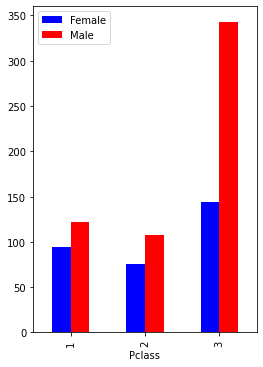

In [7]:
sex_dist_by_class.plot.bar(figsize =(4,6), color = ('blue', 'red'));

<font color='blue'>Creating a DataFrame to display the count of females and males who survived and did not survive </font>

In [8]:
columns = titanic.loc[:,['Survived', 'Female', 'Male']]
gp_survived = columns.groupby('Survived').sum()
sex_dist_by_outcome = pd.DataFrame(gp_survived)
sex_dist_by_outcome

,Female,Male
Survived,,
0,81,464
1,233,109


<font color='blue'>Visualization of sex distribution by outcome</font> 

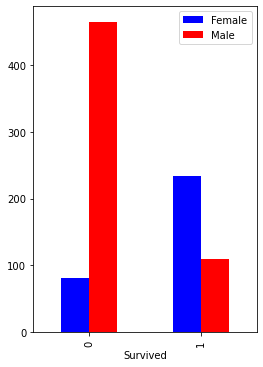

In [9]:
sex_dist_by_outcome.plot.bar(figsize =(4,6), color = ('blue', 'red'));